### Importing the Libraries


In [1]:
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

In [2]:
data =  load_breast_cancer(as_frame=True)
df_labels = pd.DataFrame(data.data,columns=data.feature_names)
df_target = pd.Series(data.target)

In [17]:
df_labels.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 30 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error         5

In [20]:
df_labels.isnull().sum()

mean radius                0
mean texture               0
mean perimeter             0
mean area                  0
mean smoothness            0
mean compactness           0
mean concavity             0
mean concave points        0
mean symmetry              0
mean fractal dimension     0
radius error               0
texture error              0
perimeter error            0
area error                 0
smoothness error           0
compactness error          0
concavity error            0
concave points error       0
symmetry error             0
fractal dimension error    0
worst radius               0
worst texture              0
worst perimeter            0
worst area                 0
worst smoothness           0
worst compactness          0
worst concavity            0
worst concave points       0
worst symmetry             0
worst fractal dimension    0
dtype: int64

Text(0.5, 1.0, 'Correlation Matrix')

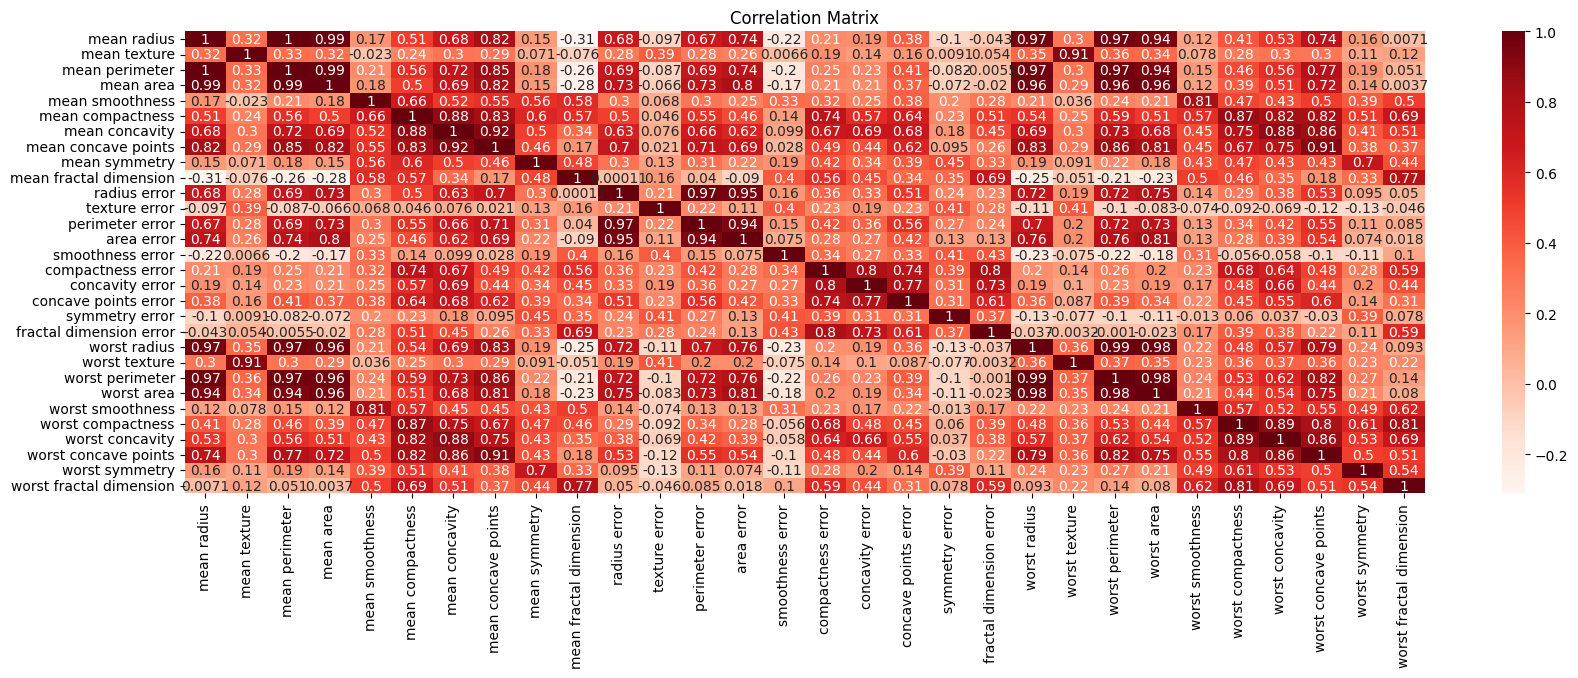

In [29]:
fig, ax = plt.subplots(figsize=(20,6))
sns.heatmap(df_labels.corr(numeric_only=True),cmap='Reds',annot=True,ax=ax)
plt.title('Correlation Matrix')

In [31]:
xtrain, xtest, ytrain, ytest = train_test_split(df_labels, df_target, test_size=0.3, random_state=7)

In [35]:
print("The shape xtrain: ", xtrain.shape)
print("The shape xtest: ",xtest.shape)
print("The shape of ytrain: ",ytrain.shape)
print("The shape of ytest", ytest.shape)

The shape xtrain:  (398, 30)
The shape xtest:  (171, 30)
The shape of ytrain:  (398,)
The shape of ytest (171,)


In [38]:
scaler = StandardScaler()
xtrain = scaler.fit_transform(xtrain)
xtest = scaler.transform(xtest)

lr_model = LogisticRegression()
lr_model.fit(xtrain,ytrain)

LogisticRegression()

In [42]:
lrpred = lr_model.predict(xtest)

lraccuracy = accuracy_score(ytest,lrpred)
lrclassification = classification_report(ytest,lrpred,target_names=data.target_names)

print(f"Accuracy: {lraccuracy:.2f}")
print(f"Classification Report:")
print(lrclassification)

Accuracy: 0.97
Classification Report:
              precision    recall  f1-score   support

   malignant       1.00      0.91      0.95        55
      benign       0.96      1.00      0.98       116

    accuracy                           0.97       171
   macro avg       0.98      0.95      0.97       171
weighted avg       0.97      0.97      0.97       171

